With this project we are trying to extract meaningful information by analysing and visualizing dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Stores.csv')

In [4]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


#About Dataset:

Dataset contains 5 features which are:


1. **Store ID**: An identifier for each store.
   - Data Type: Integer
   - Example: 1, 2, 3, 4, 5

2. **Store_Area**: The area size of each store in square units.
   - Data Type: Integer (assuming square units)
   - Example: 1659, 1461, 1340, 1451, 1770

3. **Items_Available**: The number of items available in each store.
   - Data Type: Integer
   - Example: 1961, 1752, 1609, 1748, 2111

4. **Daily_Customer_Count**: The count of customers visiting each store per day.
   - Data Type: Integer
   - Example: 530, 210, 720, 620, 450

5. **Store_Sales**: The total sales generated by each store.
   - Data Type: Integer
   - Example: 66490, 39820, 54010, 53730, 46620



In [5]:
df_copy = pd.read_csv('Stores.csv')

In [6]:
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


Our dataset consists of 896 unique records and 5 attributes

In [7]:
df.shape

(896, 5)

In [8]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [9]:
df = df.drop(['Store ID '], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [11]:
df.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

**In this dataset, there are no null values or missing values in any of feature of the dataset.**

In [12]:
df.nunique()

Store_Area              583
Items_Available         616
Daily_Customer_Count    130
Store_Sales             816
dtype: int64

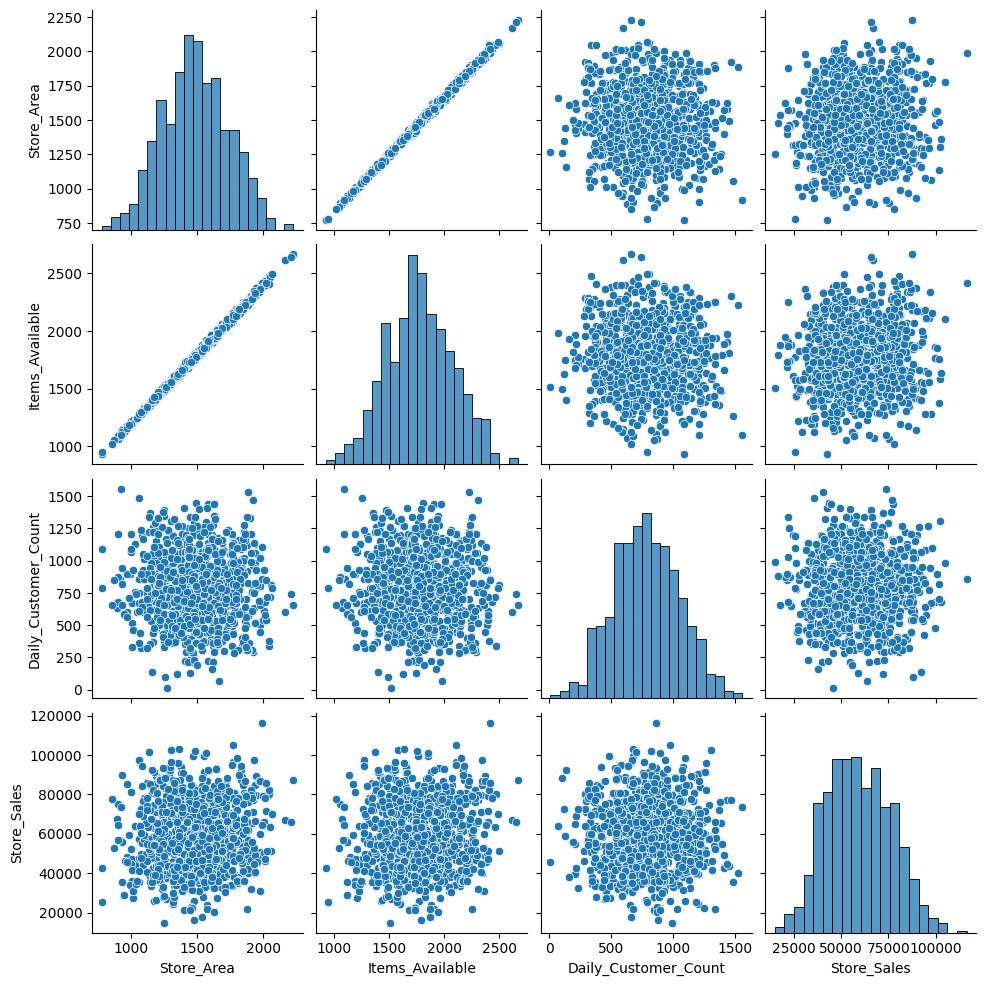

In [13]:
sns.pairplot(data=df)

On Analysing correlationship amongst the features, Majority of the features are not correlated with each other, except Store_Area feature and Items_Available feature.

Store_Area anf Items_Available feature has high correlational value, therefore they are highly dependent on the each other.

In [14]:
print("Correlation between Store_Area and Items_Available is ",df['Store_Area'].corr(df['Items_Available']))

Correlation between Store_Area and Items_Available is  0.9988907507528336


In [15]:
df.corr()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000


# Detecting outliers

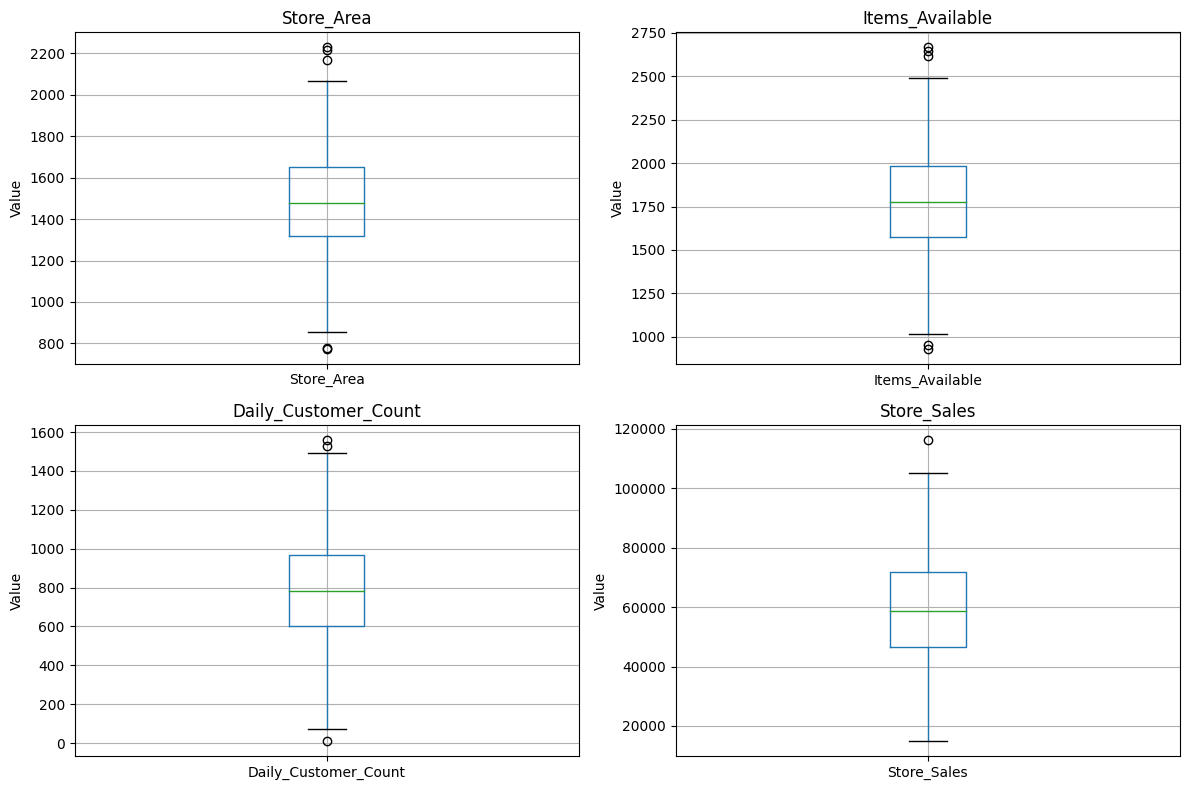

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting boxplots for all features in a grid layout
num_rows = 2
num_cols = 2

plt.figure(figsize=(12, 8))

# Loop through each column in the DataFrame and plot a boxplot
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    df.boxplot(column=[column])
    plt.title(column)
    plt.ylabel("Value")

plt.tight_layout()  # subplot layout to prevent overlap
plt.show()


**Store_Area**: The area size of each store in square units.

Data Type: Integer (assuming square units)
Example: 1659, 1461, 1340, 1451, 177

In [17]:
fig = px.violin(df, y="Store_Area", box=True, points='all')
fig.update_layout(
    title="Violinplot of Store_Area Feature"
)
fig.show()

boxplot chart for Store_Area feature shows that majority of the values lies between the range of 1000 and 2000.

There are some values that lies below 800 and above 2200, they are not the outliers, because there are small stores which could have area size below 800 (assumming square meter) or big stores which could be above 2200 (assumming square meter). The lower values are near to Minimum values and higher values are near to Maximum values.

**Items_Available**: The number of items available in each store.
   - Data Type: Integer
   - Example: 1961, 1752, 1609, 1748, 2111



In [18]:
fig = px.violin(df, y="Items_Available", box=True, points='all')
fig.update_layout(
    title="Violinplot of Items_Available Feature"
)
fig.show()

boxplot chart for **Items_Available** feature shows that majority of the values lies between the range of 1000 and 2500.

There are some values that lies below 1000 and above 2500, they are not the outliers, The lower values are near to Minimum values (932 items) and higher values are near to Maximum values (2667 items).

**Daily_Customer_Count**: The count of customers visiting each store per day.
   - Data Type: Integer
   - Example: 530, 210, 720, 620, 450



In [19]:
fig = px.violin(df, y="Daily_Customer_Count", box=True, points='all')
fig.update_layout(
    title="Violinplot of Daily_Customer_Count Feature"
)
fig.show()

boxplot chart for Daily_Customer_Count feature shows that majority of the values lies between the range of 0 and 1500.

The Minimum values (10 customers) and Maximum values (1560 customers). but we can observe that the data shows normal distribution graph, it is not skewed in either side. Therefore, there are no outliers

**Store_Sales**: The total sales generated by each store.
   - Data Type: Integer
   - Example: 66490, 39820, 54010, 53730, 46620

In [20]:
fig = px.violin(df, y="Store_Sales", box=True, points='all')
fig.update_layout(
    title="Violinplot of Store_Sales Feature"
)
fig.show()

boxplot chart for Store_Sales feature shows that majority of the values lies between the range of 15k and 116.32k.

The data shows gaussian distribution, and it very little skewed towards right side because of single value only. maximum value is 116.32k, it could be the store sales value for a particular store which doesn't have much difference then a upper fence value of 105.15k.

In [21]:
# For Interactive Visualisation
try:
    from dash import Dash, dcc, html, Input, Output
    import plotly.express as px
    import plotly.graph_objects as go
except ImportError:
    %pip install dash
    from dash import Dash, dcc, html, Input, Output
    import plotly.express as px
    import plotly.graph_objects as go


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 41.8 MB/s eta 0:00:00


In [22]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


Based on this above statistical analysis, this dataset has not outliers.

#### Chart 1. Distribution of Store Area
- Use ML algorithms to analyse the distribution of store areas.
- Visualize the distribution using a histogram to show the frequency of different store area sizes


**Store_Area**: The area size of each store in square units.

Data Type: Integer (assuming square units)
Example: 1659, 1461, 1340, 1451, 177

In [23]:
df['Store_Area'].shape

(896,)

In [24]:
print("Unique values in Store_Area features are",df['Store_Area'].nunique())

Unique values in Store_Area features are 583


In [25]:
print("Statistics of Store_Area feature: ")
print(df['Store_Area'].describe())

Statistics of Store_Area feature: 
count     896.000000
mean     1485.409598
std       250.237011
min       775.000000
25%      1316.750000
50%      1477.000000
75%      1653.500000
max      2229.000000
Name: Store_Area, dtype: float64


In [26]:
fig = px.violin(df, y="Store_Area", box=True, points='all')
fig.update_layout(
    title="Violinplot of Store_Area Feature"
)
fig.show()

Interactive Visualisation:

In [27]:
# For Interactive Visualisation
try:
    from dash import Dash, dcc, html, Input, Output
    import plotly.express as px
    import plotly.graph_objects as go
except ImportError:
    %pip install dash
    from dash import Dash, dcc, html, Input, Output
    import plotly.express as px
    import plotly.graph_objects as go


In [28]:
df['Store_Area'].nunique()

583

In [29]:
fig = px.histogram(df["Store_Area"], color=df["Store_Area"], text_auto=True,orientation='v', nbins=100)
fig.update_layout(bargap=0.05)
fig.show()

In the Store_Area feature, out of 896 values 583 are uniques values. which indicates that there are many store with same size from the Store Area asspect. the above visualisation shows the distribution of Store_Area feature. In addition to that Color code in the distribution helps in visualising number of stores with same size in terms of sqaure area which are denoted by different colors.

In [30]:
fig = px.histogram(df["Store_Area"] ,histfunc="count", text_auto=True,orientation='v', marginal='violin')
fig.update_layout(bargap=0.05)
fig.show()

In [31]:
fig = px.histogram(df["Store_Area"],histfunc="count", text_auto=True,orientation='v', histnorm='percent')
fig.update_layout(bargap=0.05)
fig.show()

In [32]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'df' with your actual DataFrame name

# Choose the feature for which you want to find quartiles
feature = "Store_Area"

# Create a range slider for Q1 and Q3
Q_slider = widgets.FloatRangeSlider(value=[1200, 1800], min=df[feature].min(), max=df[feature].max(),
                                     step=10, description='Range:', continuous_update=False)

# Define a function to calculate and display the percentage within Q1 and Q3
def calculate_percentage_within_Q1_Q3(quartiles):
    Q1, Q3 = quartiles
    num_within_Q1_Q3 = ((df[feature] >= Q1) & (df[feature] <= Q3)).sum()
    total_count = len(df[feature])
    percentage_within_Q1_Q3 = (num_within_Q1_Q3 / total_count) * 100
    print(f"\nPercentage of data within range of ({Q1}) and ({Q3}) of {feature}: {percentage_within_Q1_Q3:.2f}%")
    print(f"Number of store with Store Area size of range between ({Q1}) and ({Q3}) of {feature}: {num_within_Q1_Q3}\n")

    # Plot histogram with Q1 and Q3 range
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20, color='lightblue', alpha=0.7, rwidth=1)
    plt.axvline(x=Q1, color='red', linestyle='--', label='Start Range')
    plt.axvline(x=Q3, color='green', linestyle='--', label='Ending Range')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title('Histogram with Q1 and Q3 Range')
    plt.legend()
    plt.show()

# Connect the range slider to the function
widgets.interactive(calculate_percentage_within_Q1_Q3, quartiles=Q_slider)


interactive(children=(FloatRangeSlider(value=(1200.0, 1800.0), continuous_update=False, description='Range:', …

Using above visualisation and calculations, it could observed that more than 75% of stores in the dataset has store area of between 1200 (area unit) and 1800 (area unit) and 95% of the stores have more 1000 Store Area unit and less then 2000 Store Area unit.

#### Chart 2. Relationship between Store Area and Daily Customer Count (Scatter Plot)
- Perform predictive analysis to understand the relationship between store area and daily customer count using ML regression techniques.
- Develop a predictive model to estimate the daily customer count based on the store area.
- Create a scatter plot visualization to depict the relationship between store area and daily customer count.


In [33]:
df.corr()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000


In [34]:
corr_sa_dcc = df['Store_Area'].corr(df['Daily_Customer_Count'])
print('Correlation of Store Area and Daily_Customer_Count: ',corr_sa_dcc)

Correlation of Store Area and Daily_Customer_Count:  -0.0414230953026916


In [35]:
# x and y given as DataFrame columns
import plotly.express as px
fig = px.scatter(df,x='Store_Area',y='Daily_Customer_Count')
fig.show()

Here, we could observe that, the relationship between Store_Area and Daily_Customer_Count feature is not linear, it is scattered. In addition to that correlation value between these feature is close to 0 i.e. (-0.0414230953026916), There we should not have apply linear regression model to it.

developing regression model to predict the values

In [36]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [37]:
X = df.iloc[:,0:1]

In [38]:
y = df.iloc[:,2:3]

In [39]:
if len(X) != len(y):
    print('Lenght of Store_Area array and Daily_Customer_Count array must match')

In [40]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)


In [42]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Model evaluation
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 82351.21791416788
R^2 Score: -0.0015762354779482735


Although when we implement linear regression model to find the relationship between Store_Area and Daily_Customer_Count feature, **the error value is very high i.e. 82351.21 and Model Accuracy is very low i.e. -0.0015.**

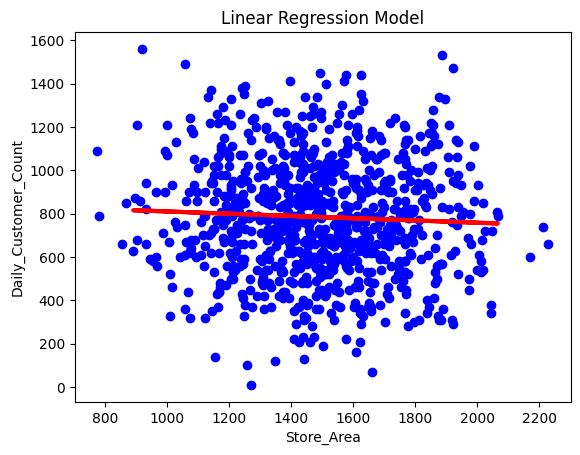

In [43]:
# Visualize the regression line
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Linear Regression Model')
plt.xlabel('Store_Area')
plt.ylabel('Daily_Customer_Count')
plt.show()

There is no linear relationship exist between the defined features, so we have analysed the data using Unsupervised Machine Learning Techinique like K-Means CLustering Algoirthm.

In [44]:
# Clusterring

In [45]:
# K-Means CLustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [46]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [47]:
temp_df = df.drop(['Items_Available','Store_Sales'],axis=1)

In [48]:
temp_df.head()

,Store_Area,Daily_Customer_Count
0,1659,530
1,1461,210
2,1340,720
3,1451,620
4,1770,450


In [49]:
X_data = temp_df.iloc[:].values

In [50]:
X_data

array([[1659,  530],
       [1461,  210],
       [1340,  720],
       ...,
       [1200, 1060],
       [1299,  770],
       [1174, 1110]])

We are using various technique to determine optimal number of cluster require to fit the data.

1. Elbow Technique
2. Silhouette Score

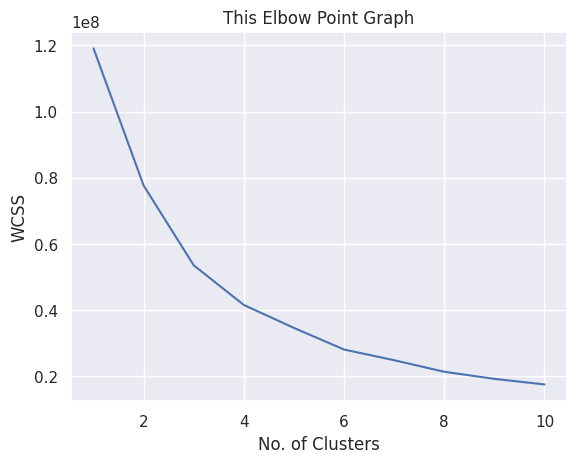

In [51]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=100)
  kmeans.fit(X_data)

  wcss.append(kmeans.inertia_)

  # plot as elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('This Elbow Point Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

Using elbow technique, it is difficult to determine the optimal number of cluster required. It is confusing to consider number of cluster whether we should consider 3 or 4 or 6 or 8.

In order to determine optimal number of clusters precisely we have use silhouette score.

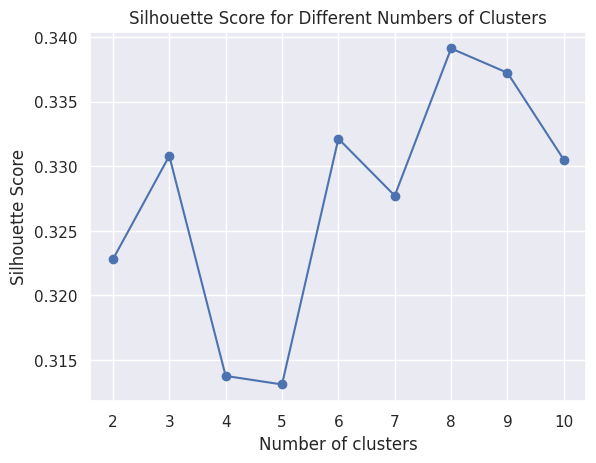

Optimal number of clusters: 8


In [52]:
from sklearn.metrics import silhouette_score

# Range of clusters to try
min_clusters = 2
max_clusters = 10

# Store silhouette scores for each number of clusters
silhouette_scores = []

# Calculate silhouette scores for different number of clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_data)
    silhouette_avg = silhouette_score(X_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

# Find the optimal number of clusters
optimal_clusters = np.argmax(silhouette_scores) + min_clusters
print(f'Optimal number of clusters: {optimal_clusters}')

Using Silhouette score technique, we could observe that the score is highest around 0.34 when the cluster value is 8. therefore we have consider 8 as the optimal number of clusters require for analysing this dataset using K-Means Clustering.

In [53]:
n_clusters_val = 8

In [54]:

kmeans = KMeans(n_clusters=n_clusters_val,init='k-means++',random_state=0)

Y = kmeans.fit_predict(X_data)
print(Y)
print("Length is:",len(Y))

[1 7 2 2 1 2 5 0 3 0 0 6 4 4 2 6 4 6 5 6 7 2 6 2 3 6 5 5 2 6 5 0 5 1 5 6 2
 0 6 7 0 3 6 6 3 3 6 6 4 5 5 4 7 1 5 2 4 5 4 1 1 1 2 5 2 6 1 7 2 2 6 3 3 2
 2 2 7 0 6 2 2 5 7 4 0 7 6 3 0 7 5 1 1 2 4 1 4 4 6 4 3 6 0 5 5 3 6 1 2 5 0
 2 4 5 4 3 3 1 5 6 5 5 7 6 7 1 1 6 5 7 5 3 0 6 5 6 6 2 1 3 6 6 7 2 2 5 7 3
 3 6 2 1 2 1 2 7 4 7 0 0 6 2 2 1 6 3 2 2 3 7 5 5 3 1 2 2 2 1 1 4 6 0 6 6 2
 7 5 4 3 1 5 4 5 6 2 1 4 5 7 3 2 5 3 3 5 6 2 7 4 2 7 5 1 1 2 1 5 5 5 2 7 2
 7 0 6 6 4 4 7 5 7 0 7 5 2 4 3 5 1 6 0 2 7 1 0 4 3 0 6 2 7 2 2 5 2 7 6 3 1
 7 0 3 0 4 0 5 5 6 3 2 3 1 0 1 4 5 4 5 4 2 3 1 5 5 6 0 7 2 0 6 7 0 7 7 5 7
 3 3 2 3 7 4 2 2 3 7 2 7 2 2 2 1 4 2 1 5 5 7 2 5 3 7 2 1 5 5 5 6 2 5 3 1 3
 4 4 1 7 7 7 3 1 6 2 3 6 6 2 1 2 4 7 4 5 4 0 7 6 2 3 5 6 3 2 2 3 4 3 5 5 6
 3 0 4 6 4 5 5 2 7 6 5 3 5 4 7 5 0 5 5 2 5 5 3 6 3 7 4 3 6 6 4 7 5 2 6 4 3
 2 0 5 0 5 1 2 5 5 5 5 0 5 7 3 5 5 0 6 0 1 1 2 1 7 2 5 5 5 1 2 0 6 6 7 4 0
 6 5 0 6 5 4 5 6 3 6 7 2 2 0 5 2 2 2 1 7 2 6 6 2 3 6 5 0 5 7 6 5 3 3 6 3 6
 4 1 6 5 2 6 5 3 2 3 5 2 

In [55]:
cluster_lst = [y + 1 for y in list(Y)]

In [56]:
fig = px.histogram(cluster_lst ,histfunc="count", text_auto=True,orientation='v')
fig.update_layout(bargap=0.05,title="Distribution of Cluster Values")
fig.update_xaxes(title_text='Cluster Number')
fig.show()

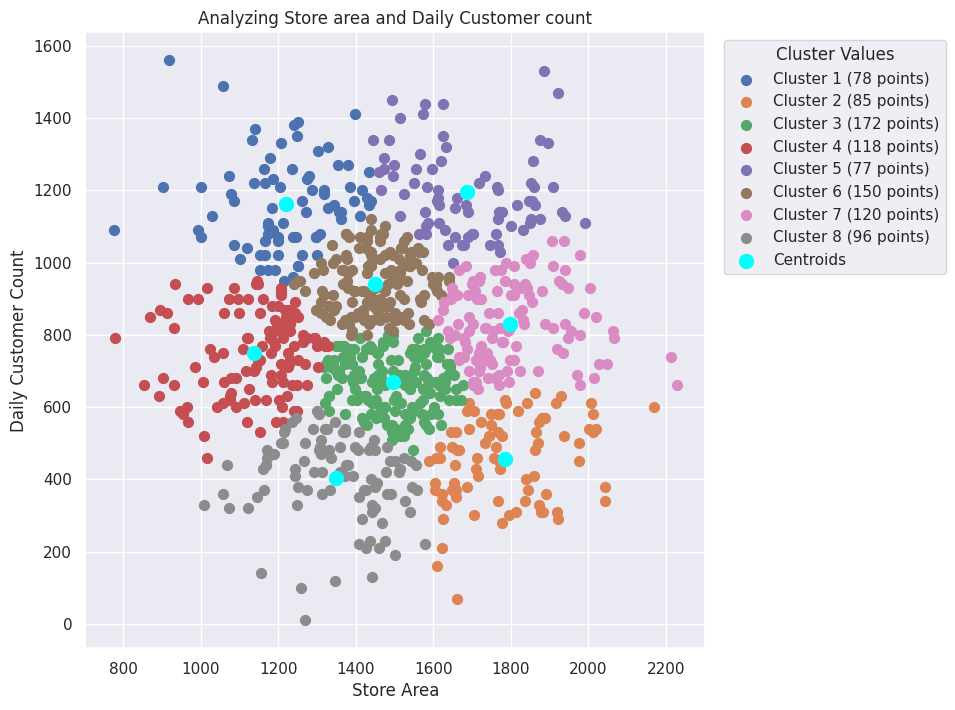

In [57]:
from collections import Counter

# Counting occurrences of each cluster
cluster_counts = Counter(Y)

# Plotting all the clusters and their Centroids
plt.figure(figsize=(8, 8))

X=X_data
# Plotting the clusters and centroids
for i in range(n_clusters_val):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], s=50, label=f'Cluster {i+1} ({cluster_counts[i]} points)')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

plt.title('Analyzing Store area and Daily Customer count')
plt.xlabel('Store Area')
plt.ylabel('Daily Customer Count')

# Adding legend to indicate cluster values
plt.legend(title='Cluster Values', loc='upper right', bbox_to_anchor=(1.40, 1))

plt.show()


Analysing and visualizing scatter plot which has total 8 different clusters indicated in different colors, we can extract amny meaningful informations.

There are total 172 stores that has store area between 1300 to 1700 area unit has around 500 - 850 daily customers indicated in green color cluster.

There are some stores irrespective of store area of either small store area or large store area, they have less daily customers below 600 which are indicated in grey and orange color cluster. In contrast to it, around  145 stores have more number of daily customers more then 1200 irrespective of their area size which are indicated in indigo blue and violet color. And data points or stores exist in the above mentioned four cluster, dentity of data is less.

There are 120 stores who store area is high has around 600 to 1000 daily customers but there are 118 stores whose store area is less but still they have same number of daily customers.

Cluster number 6 displayed in brown color indicates that 150 stores have 1200 to 1650 store area size has good number daily customers more 800. this category stores has huge space as well as average daily customers are also more, so the stores should of size of around 1500 store area unit.

#### Chart 3. Distribution of Items Available
- Aggregate stores by the number of items available using ML techniques.
- Visualize the distribution using a bar chart, where each bar represents a range of items available and the height represents the number of stores within each range.


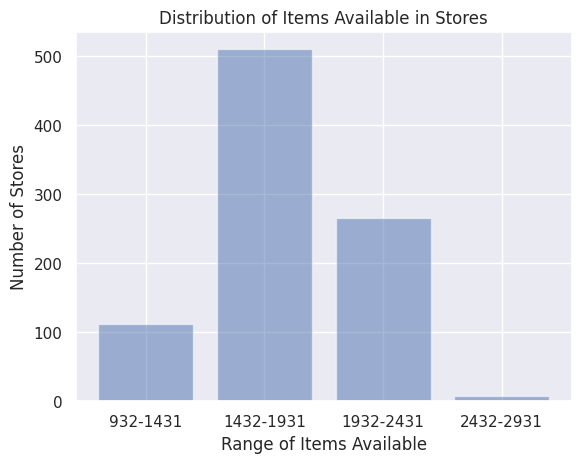

In [58]:
# Define the ranges for the items available based on the min and max values
min_value = 932
max_value = 2667
bin_width = 500  # width of the bin

# Calculate the number of bins based on the min, max, and bin width
num_bins = (max_value - min_value) // bin_width + 1

# Generate the ranges
ranges = [(min_value + i * bin_width, min_value + (i + 1) * bin_width - 1) for i in range(num_bins)]

# Count the number of stores within each range
store_counts = [0] * len(ranges)
for item_count in df['Items_Available']:
    for i, (lower, upper) in enumerate(ranges):
        if lower <= item_count <= upper:
            store_counts[i] += 1
            break

# Plot the distribution using a bar chart
x_labels = [f"{lower}-{upper}" for lower, upper in ranges]
x_pos = np.arange(len(x_labels))

plt.bar(x_pos, store_counts, align='center', alpha=0.5)
plt.xticks(x_pos, x_labels)
plt.ylabel('Number of Stores')
plt.xlabel('Range of Items Available')
plt.title('Distribution of Items Available in Stores')
plt.show()


This data visualization shows that most stores have between 1432 and 1931 items available, indicating a common trend. However, there are fewer stores with items in the range of 2432 to 2931, suggesting a disparity in inventory levels.

#### Chart 4. Relationship between Daily Customer Count and Store Sales
- Analyse the relationship between daily customer count and store sales using machine learning regression techniques.
- Develop a predictive model to estimate store sales based on the daily customer count.
- Visualize the relationship using a line chart, where daily customer count is on the x-axis and store sales is on the y-axis.


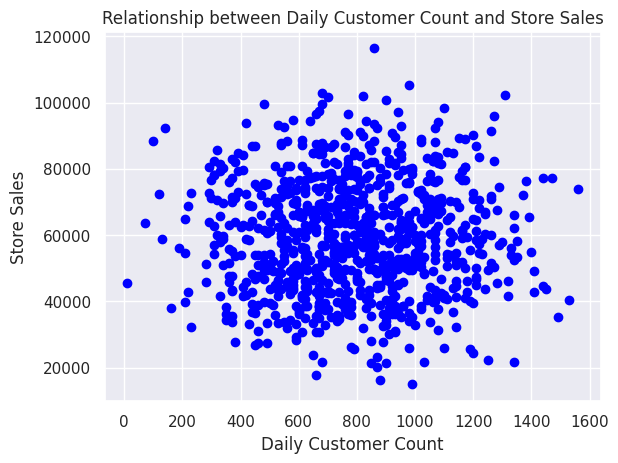

In [59]:
# Select features and target variable
X = df[['Daily_Customer_Count']]  # Feature (Independent variable)
y = df['Store_Sales']  # Target (Dependent variable)

# Data Visualization
plt.scatter(X, y, color='blue')
plt.title('Relationship between Daily Customer Count and Store Sales')
plt.xlabel('Daily Customer Count')
plt.ylabel('Store Sales')
plt.show()



The scatter plot illustrates a lack of correlation between store sales and daily customer count, revealing a non-linear pattern.

In [60]:
# Select features and target variable
X = df[['Daily_Customer_Count']]  # Feature (Independent variable)
y = df['Store_Sales']  # Target (Dependent variable)

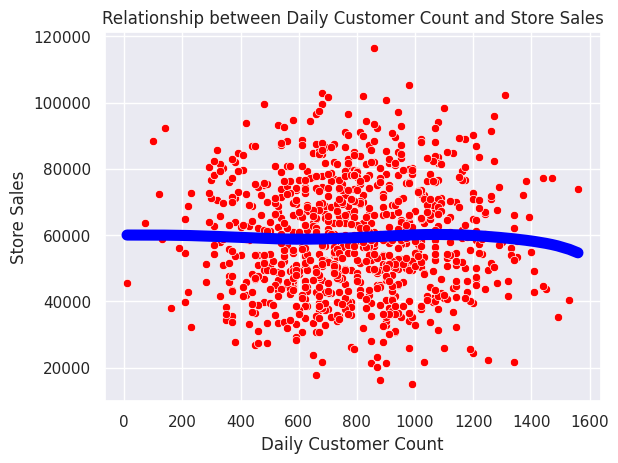

In [61]:
# Fitting Polynomial Regression(beacause of non-linear data) to the dataset
from sklearn.preprocessing import PolynomialFeatures
degree=8
poly_reg = PolynomialFeatures(degree=degree)
X= X.values.reshape(-1,1)
X_poly = poly_reg.fit_transform(X)
pol_reg_mod = LinearRegression()
pol_reg_mod.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    sns.scatterplot(data=df,x=X.flatten(), y=y, color='red')
    sns.lineplot(x=X.flatten(), y= pol_reg_mod.predict(X_poly),lw=degree, color='blue')
    plt.title('Relationship between Daily Customer Count and Store Sales')
    plt.xlabel('Daily Customer Count')
    plt.ylabel('Store Sales')
    plt.show()
    return
viz_polymonial()

In [62]:
# Predict the target variable using the polynomial regression model
y_pred = pol_reg_mod.predict(X_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) score
r2 = r2_score(y, y_pred)
print("R-squared (R2) score:", r2)

Mean Squared Error (MSE): 294885798.93001515
Root Mean Squared Error (RMSE): 17172.2391938272
R-squared (R2) score: 0.0010365625374713083


A polynomial regression model was constructed to determine the optimal fitted line but encountered difficulty in generating the regression line.

In [63]:
# Implementataion of K-means- to understand the data better
import pandas as pd
from sklearn.cluster import KMeans

# df is the DataFrame containing the data
X = df[['Daily_Customer_Count','Store_Sales']]  # Feature (Independent variable)  # Target (Dependent variable)
# Initialize KMeans object
kmeans = KMeans(n_clusters=2, random_state=42)  # You can adjust the number of clusters as needed

# Fit KMeans clustering model to the data
kmeans.fit(X)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Add cluster labels to DataFrame
df['Cluster'] = labels

# Display cluster centers
print("Cluster Centers:")
print(cluster_centers)

# Display DataFrame with cluster labels
print("\nDataFrame with Cluster Labels:")
print(df)


Cluster Centers:
[[  782.200489   74843.93643032]
 [  789.83572895 46340.04106776]]

DataFrame with Cluster Labels:
     Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  Cluster
0          1659             1961                   530        66490        0
1          1461             1752                   210        39820        1
2          1340             1609                   720        54010        1
3          1451             1748                   620        53730        1
4          1770             2111                   450        46620        1
..          ...              ...                   ...          ...      ...
891        1582             1910                  1080        66390        0
892        1387             1663                   850        82080        0
893        1200             1436                  1060        76440        0
894        1299             1560                   770        96610        0
895        1174             1429     

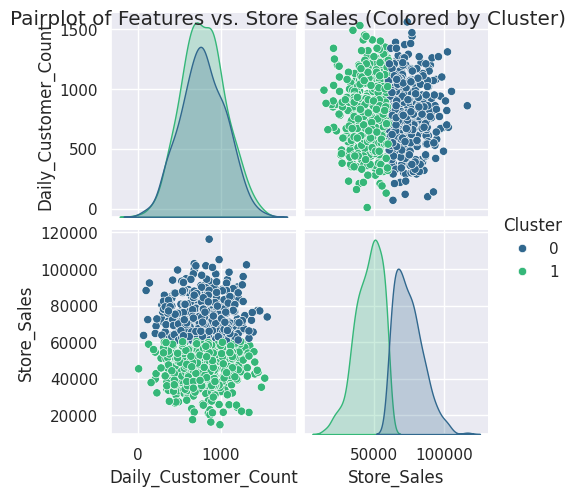

In [64]:
# Visualize K-means clustering using pairplot
sns.pairplot(df, vars=['Daily_Customer_Count', 'Store_Sales'], hue='Cluster', palette='viridis')
plt.suptitle('Pairplot of Features vs. Store Sales (Colored by Cluster)')
plt.show()

In [65]:
# find accuracy of K-means
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.5853832546771611


Since the polynomial regression approach was unsuccessful, an unsupervised K-means algorithm was implemented with two distinct centroids. The achieved accuracy of 58.3% indicates superior performance compared to alternative models.

In [66]:
# Generalization of the model
new_daily_customer_count = [1000, 130000]

# Transform the new_daily_customer_count to polynomial features
new_daily_customer_count_kmeans = kmeans.transform([new_daily_customer_count])

# Predict store sales using the transformed features
predicted_cluster = kmeans.predict(new_daily_customer_count_kmeans)
print("Predicted cluster:", predicted_cluster[0])


Predicted cluster: 0


#### Chart 5. Distribution of Store Sales
- Analyse the distribution of store sales using machine learning techniques.
- Visualize the distribution using a box plot to show the median, quartiles, and outliers of store sales.


In [67]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
# Select features
X = df[['Daily_Customer_Count','Store_Area','Items_Available']]  # Feature (Independent variable)
y = df['Store_Sales']  # Target (Dependent variable)

In [68]:
# Used Multiple linear regression because of the continuous feature values.
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
model = LinearRegression()

# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 270398518.29145885
Root Mean Squared Error (RMSE): 16443.798779219444
R-squared (R2): 0.006062836062982302


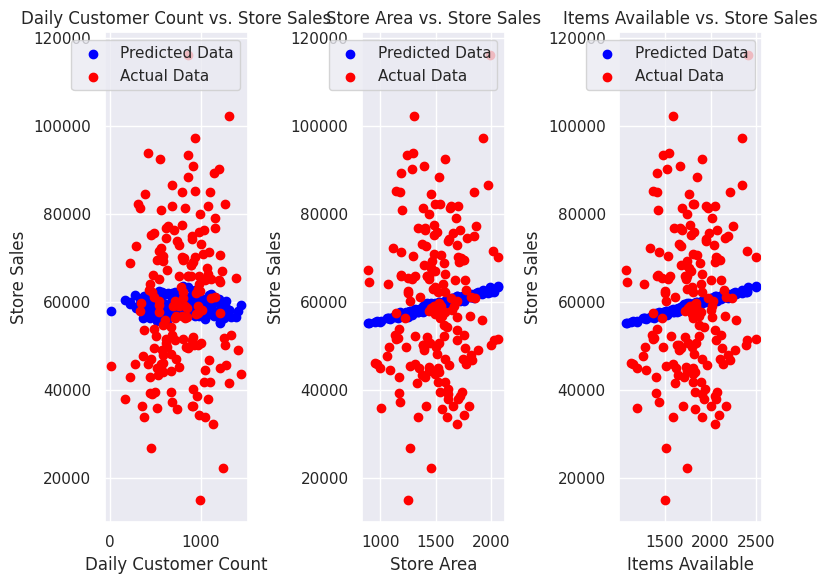

In [69]:
# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot for Daily_Customer_Count
plt.subplot(1, 3, 1)
plt.scatter(X_test['Daily_Customer_Count'], y_pred, color='blue', label='Predicted Data')
plt.scatter(X_test['Daily_Customer_Count'], y_test, color='red', label='Actual Data')
plt.title('Daily Customer Count vs. Store Sales')
plt.xlabel('Daily Customer Count')
plt.ylabel('Store Sales')
plt.legend()

# Scatter plot for Store_Area
plt.subplot(1, 3, 2)
plt.scatter(X_test['Store_Area'], y_pred, color='blue', label='Predicted Data')
plt.scatter(X_test['Store_Area'], y_test, color='red', label='Actual Data')
plt.title('Store Area vs. Store Sales')
plt.xlabel('Store Area')
plt.ylabel('Store Sales')
plt.legend()

# Scatter plot for Items_Available
plt.subplot(1, 3, 3)
plt.scatter(X_test['Items_Available'], y_pred, color='blue', label='Predicted Data')
plt.scatter(X_test['Items_Available'], y_test, color='red', label='Actual Data')
plt.title('Items Available vs. Store Sales')
plt.xlabel('Items Available')
plt.ylabel('Store Sales')
plt.legend()

plt.tight_layout()
plt.show()

The substantial disparity between the actual and predicted values is apparent due to the scattered distribution of data points for each independent variable concerning the dependent variable. This creates challenges in accurately capturing the relationship between the independent variables and the dependent variable.

In [70]:
import pandas as pd
from sklearn.cluster import KMeans

# df is the DataFrame containing the data
X = df[['Daily_Customer_Count', 'Store_Area', 'Items_Available', 'Store_Sales']]

# Initialize KMeans object
kmeans = KMeans(n_clusters=3, random_state=42)  # the number of clusters

# Fit KMeans clustering model to the data
kmeans.fit(X)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Add cluster labels to DataFrame
df['Cluster2'] = labels

# Display cluster centers
print("Cluster Centers:")
print(cluster_centers)

# Display DataFrame with cluster labels
print("\nDataFrame with Cluster Labels:")
print(df)


Cluster Centers:
[[  777.090301    1452.86622074  1742.00668896 40594.7826087 ]
 [  786.28099174  1505.81818182  1806.65289256 81126.48760331]
 [  794.1971831   1498.90704225  1798.96901408 60305.12676056]]

DataFrame with Cluster Labels:
     Store_Area  Items_Available  Daily_Customer_Count  Store_Sales  Cluster  \
0          1659             1961                   530        66490        0   
1          1461             1752                   210        39820        1   
2          1340             1609                   720        54010        1   
3          1451             1748                   620        53730        1   
4          1770             2111                   450        46620        1   
..          ...              ...                   ...          ...      ...   
891        1582             1910                  1080        66390        0   
892        1387             1663                   850        82080        0   
893        1200             1436         

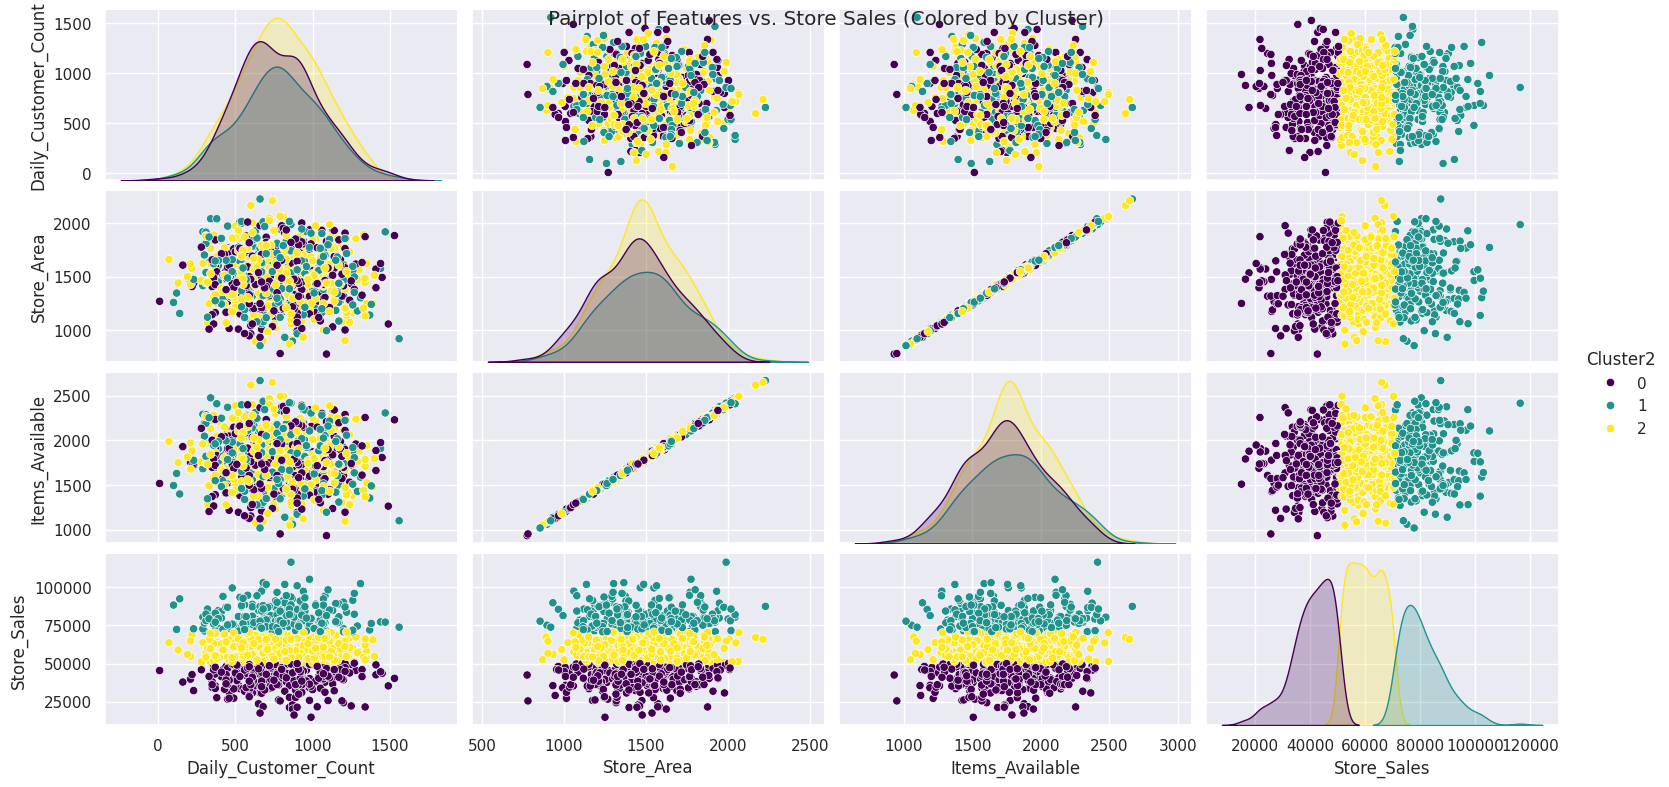

In [71]:
# Visualize K-means clustering using pairplot
sns.pairplot(df, vars=['Daily_Customer_Count', 'Store_Area', 'Items_Available', 'Store_Sales'], hue='Cluster2', palette='viridis', height = 2, aspect = 2)
plt.suptitle('Pairplot of Features vs. Store Sales (Colored by Cluster)')
plt.show()


In [72]:
# accuracy of the cluster
silhouette = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.5287420066833058


In [73]:
# Generalization of the model
# Define the sales_cluster as a list of lists
sales_cluster = [[1461, 1752, 210, 60000]]

# Predict cluster using the transformed features
predicted_cluster = kmeans.predict(sales_cluster)
print("Predicted cluster:", predicted_cluster[0])


Predicted cluster: 2


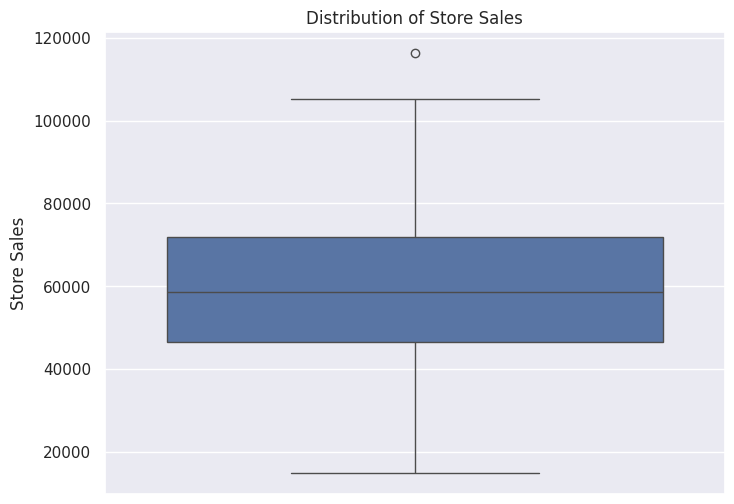

In [74]:
# df is the DataFrame containing the data
y = df['Store_Sales']

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=y)
plt.title('Distribution of Store Sales')
plt.ylabel('Store Sales')
plt.show()

The box plot serves as a tool to identify outliers, representing data points that deviate from the typical distribution of the sample. In the case of the "store sales" feature, the box plot reveals there is a store doing well as compared to others. And the median value of sales recorded at 58605.0.

#### Chart 6. Average Daily Customer Count by Store Area
	- Aggregate the daily customer count by different ranges of store areas using machine learning techniques.
	- Visualize the average daily customer count for each range using a bar chart, where each bar represents a range of store areas.

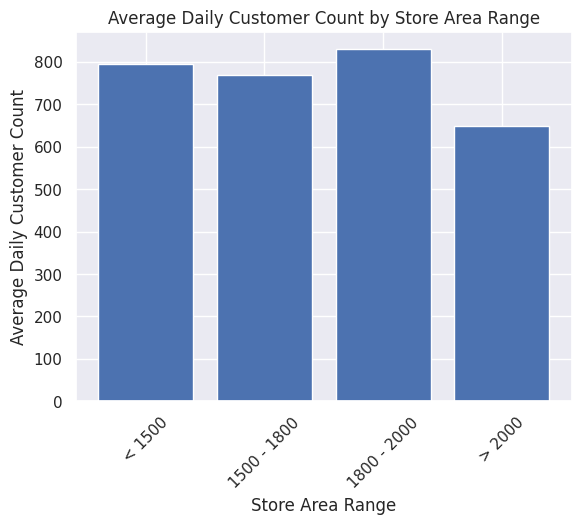

In [75]:
# Define ranges for store areas
bins = [0, 1500, 1800, 2000, df_copy['Store_Area'].max()]
labels = ['< 1500', '1500 - 1800', '1800 - 2000', '> 2000']

# Create a new column for store area ranges
df_copy['Store_Area_Range'] = pd.cut(df_copy['Store_Area'], bins=bins, labels=labels, right=False)

# Aggregate daily customer count by store area ranges
agg_df = df_copy.groupby('Store_Area_Range')['Daily_Customer_Count'].mean().reset_index()

# Create bar plot using matplotlib
plt.bar(agg_df['Store_Area_Range'], agg_df['Daily_Customer_Count'])
plt.xlabel('Store Area Range')
plt.ylabel('Average Daily Customer Count')
plt.title('Average Daily Customer Count by Store Area Range')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### The relationship between customer count and store areas is non-linear. Thus, an expansion in store area does not invariably lead to a proportional increase in the number of customers.

#### Chart 7. Correlation Matrix Heatmap
- Generate a correlation matrix using machine learning techniques to explore the relationships between different variables (store area, items available, daily customer count, store sales).
- Visualize the correlation matrix using a heatmap, where each cell represents the correlation coefficient between two variables.


In [76]:
# Calculate the correlation matrix
corr_matrix = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales']].corr()
corr_matrix

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000


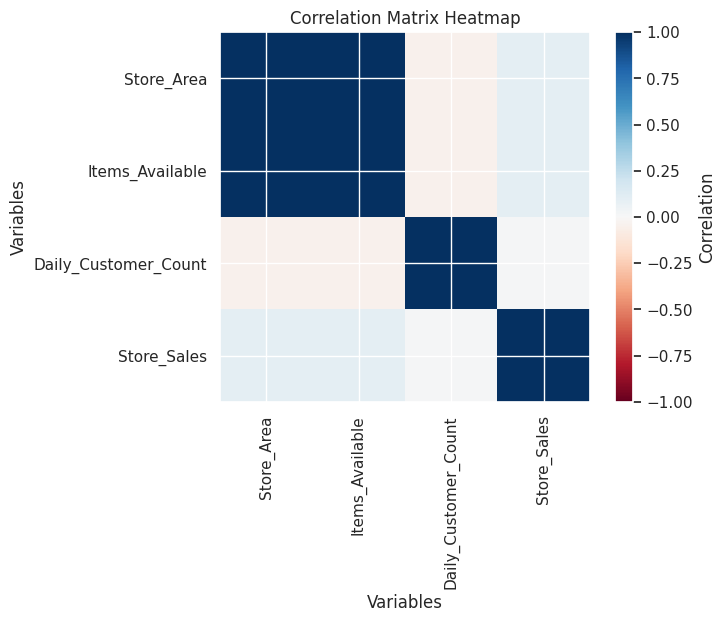

In [77]:
import matplotlib.pyplot as plt

# Create heatmap using matplotlib
plt.imshow(corr_matrix.values, cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()


- Correlation matrices explore the relationships between different variables (store area, items available, daily customer count, store sales).
- Store Area and Items Available have a very strong positive correlation of approximately 0.99. This suggests that stores with larger areas tend to have more items available.
Daily Customer Count shows a very weak negative correlation with both Store Area and Items Available, suggesting that there's no significant relationship between these variables.
Store Sales have a very weak positive correlation with Store Area and Items Available, indicating that larger stores with more items available may have slightly higher sales, but the correlation is not strong.


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go

# Create Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    dcc.RadioItems(
        id='radio-button',
        options=[
            {'label': 'Aggregate stores by the number of items available ', 'value': 'plot-3'},
            {'label': 'Visualize K-means clustering using pairplot', 'value': 'plot-4'},
            {'label': 'Distribution of Store Sales', 'value': 'plot-5'},
            {'label': 'Average Daily Customer Count by Store Area Range', 'value': 'plot-6'},
            {'label': 'Correlation Matrix Heatmap', 'value': 'plot-8'}

        ],
        value='bar-chart',
        labelStyle={'display': 'block'}
    ),
    html.Div(id='output-graph')
])

# Define callback to update the displayed plot based on the selected radio button
@app.callback(
    Output('output-graph', 'children'),
    [Input('radio-button', 'value')]
)
def update_graph(selected_value):
    if selected_value == 'plot-6':
        # Define ranges for store areas
        bins = [0, 1500, 1800, 2000, df_copy['Store_Area'].max()]
        labels = ['< 1500', '1500 - 1800', '1800 - 2000', '> 2000']

        # Create a new column for store area ranges
        df_copy['Store_Area_Range'] = pd.cut(df_copy['Store_Area'], bins=bins, labels=labels, right=False)

        # Aggregate daily customer count by store area ranges
        agg_df = df_copy.groupby('Store_Area_Range')['Daily_Customer_Count'].mean().reset_index()

        # Create an interactive bar chart using Plotly
        fig = px.bar(agg_df, x='Store_Area_Range', y='Daily_Customer_Count',
                     title='Average Daily Customer Count by Store Area Range',
                     labels={'Store_Area_Range': 'Store Area Range', 'Daily_Customer_Count': 'Average Daily Customer Count'},
                     hover_name='Store_Area_Range', hover_data={'Store_Area_Range': False, 'Daily_Customer_Count': True})
        return dcc.Graph(figure=fig)
    elif selected_value == 'plot-8':
        # Create an interactive heatmap using Plotly with color scale from red to blue
        trace = go.Heatmap(z=corr_matrix.values,
                   x=corr_matrix.columns,
                   y=corr_matrix.columns,
                   colorscale='RdBu',  # Red to Blue color scale
                   zmin=-1, zmax=1)

        layout = go.Layout(title='Correlation Matrix Heatmap',
                           xaxis=dict(title='Variables'),
                           yaxis=dict(title='Variables'))

        fig = go.Figure(data=[trace], layout=layout)
        return dcc.Graph(figure=fig)

    elif selected_value == 'plot-3':
        # Define the ranges for the items available based on the min and max values
        min_value = 932
        max_value = 2667
        bin_width = 500  # Adjust this value as needed

        # Calculate the number of bins based on the min, max, and bin width
        num_bins = (max_value - min_value) // bin_width + 1

        # Generate the ranges
        ranges = [(min_value + i * bin_width, min_value + (i + 1) * bin_width - 1) for i in range(num_bins)]

        # Count the number of stores within each range
        store_counts = [0] * len(ranges)
        for item_count in df_copy['Items_Available']:
            for i, (lower, upper) in enumerate(ranges):
                if lower <= item_count <= upper:
                    store_counts[i] += 1
                    break

        # Plot the distribution using a bar chart
        x_labels = [f"{lower}-{upper}" for lower, upper in ranges]
        x_pos = np.arange(len(x_labels))

        # Create an interactive bar chart using Plotly
        fig = px.bar(x=x_labels, y=store_counts, labels={'x': 'Range of Items Available', 'y': 'Number of Stores'},
                    title='Distribution of Items Available in Stores')
        return dcc.Graph(figure=fig)

    elif selected_value == 'plot-4':
        # Visualize K-means clustering using pairplot
        fig = px.scatter(df, x='Daily_Customer_Count', y='Store_Sales', color='Cluster',
                         title='Scatter plot of  Features vs. Store Sales (Colored by Cluster)',
                         color_continuous_scale='viridis')
        fig.update_traces(marker=dict(size=5))  # Adjust marker size as needed
        return dcc.Graph(figure=fig)

    elif selected_value == 'plot-5':
        # Distribution of Store Sales using a box plot to show the median, quartiles, and outliers of store sales.
        fig = go.Figure(data=[go.Box(y=df['Store_Sales'])])
        fig.update_layout(title='Distribution of Store Sales', yaxis_title='Store Sales')
        return dcc.Graph(figure=fig)



if __name__ == '__main__':
    app.run_server(debug=True, port=8051)
